In [13]:
#Scratch Assay single image sgmentation

import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2
### This is required for variance
from scipy import ndimage 

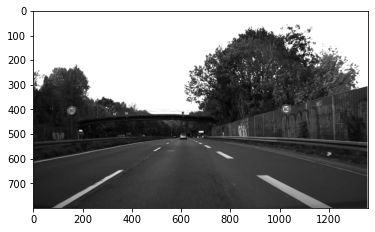

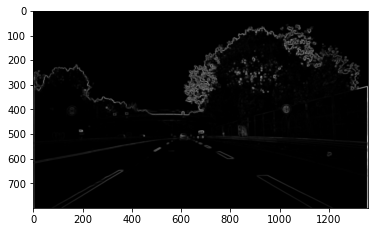

In [2]:
##################################################
#Variance - not a great way to quantify texture
path = 'TrainIJCNN2013/00127.ppm'
img = io.imread(path,as_gray = True)
plt.imshow(img,cmap='gray')
plt.show()

k= 6
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = (img_sqr_mean - img_mean**2)
plt.imshow(img_var,cmap = 'gray')

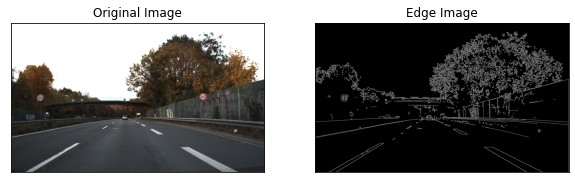

In [3]:
img = io.imread(path)

########


#######

edges = cv2.Canny(img,100,200)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

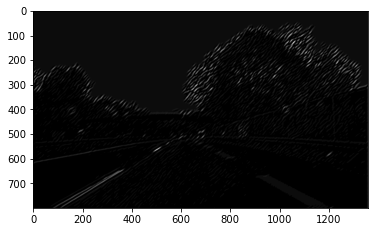

In [4]:
#######################################################
#GABOR - A great filter for texture but usually efficient
#if we know exact parameters. Good choice for generating features
#for machine learning
img = io.imread(path, as_gray=True)

ksize= 60
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')
plt.show()

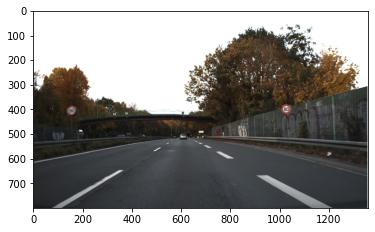

C:\Users\uabhi\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


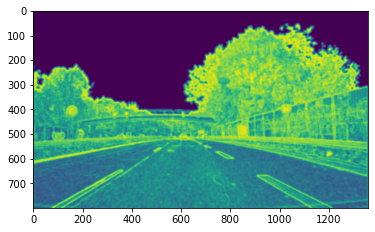

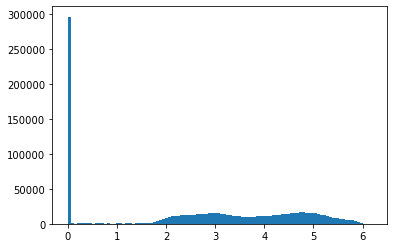

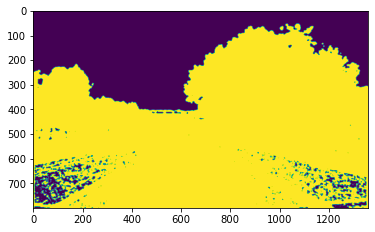

In [5]:
###########################################################
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
from skimage.filters.rank import entropy
from skimage.morphology import disk


img = io.imread(path)
plt.imshow(img)
plt.show()


img = io.imread(path, as_gray=True)

entropy_img = entropy(img, disk(5))
plt.imshow(entropy_img)
plt.show()
#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.

maxi = np.max(entropy_img)
plt.hist(entropy_img.flat, bins=100, range=(0,maxi))  #.flat returns the flattened numpy array (1D)
plt.show()

thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img >= thresh
plt.imshow(binary)

In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [7]:
filtered_image.shape

(800, 1360)

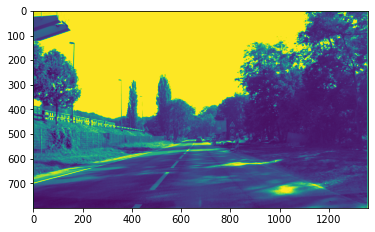

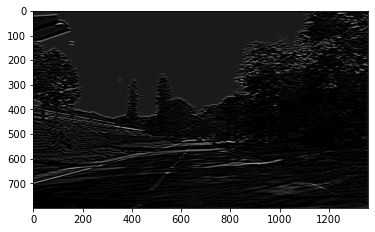

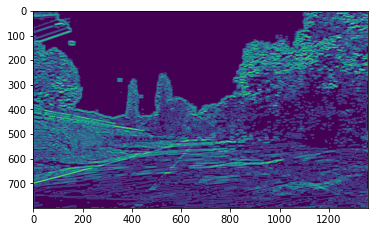

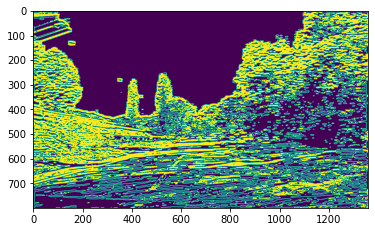

In [16]:
path = 'TrainIJCNN2013/00071.ppm'

img = io.imread(path, as_gray=True)
plt.imshow(img)
plt.show()

ksize= 10
theta=np.pi*3/2
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')
plt.show()




img = filtered_image

entropy_img = entropy(img, disk(2))
plt.imshow(entropy_img)
plt.show()
#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.

maxi = np.max(entropy_img)
plt.hist(entropy_img.flat, bins=100, range=(0,maxi))  #.flat returns the flattened numpy array (1D)


thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img >= thresh
plt.imshow(binary)